In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
import pickle

In [25]:
df = pd.read_csv('../../data/dataframes/df.csv')

In [34]:
df

,timestamp,date,consommation,h_type,h_surface,nb_people,h_ref
0,0:00,12/14/2022,0.7197,A,110,5,370
1,0:30,12/14/2022,0.7353,A,110,5,370
2,1:00,12/14/2022,0.5541,A,110,5,370
3,1:30,12/14/2022,1.0196,A,110,5,370
4,2:00,12/14/2022,0.9321,A,110,5,370
...,...,...,...,...,...,...,...
13465915,21:30,1/1/2020,0.3996,A,50,2,289
13465916,22:00,1/1/2020,0.4192,A,50,2,289
13465917,22:30,1/1/2020,0.5329,A,50,2,289
13465918,23:00,1/1/2020,0.4290,A,50,2,289


In [4]:
# dict_encoding = { "0:00" : 1,
#                     "0:30" : 2,
#                     "1:00" : 3,
#                     "1:30" : 4,
#                     "2:00" : 5,
#                     "2:30" : 6,
#                     "3:00" : 7,
#                     "3:30" : 8,
#                     "4:00" : 9,
#                     "4:30" : 10,
#                     "5:00" : 11,
#                     "5:30" : 12,
#                     "6:00" : 13,
#                     "6:30" : 14,
#                     "7:00" : 15,
#                     "7:30" : 16,
#                     "8:00" : 17,
#                     "8:30" : 18,
#                     "9:00" : 19,
#                     "9:30" : 20,
#                     "10:00" : 21,
#                     "10:30" : 22,
#                     "11:00" : 23, 
#                     "11:30" : 24,
#                     "12:00" : 25, 
#                     "12:30" : 26, 
#                     "13:00" : 27, 
#                     "13:30" : 28, 
#                     "14:00" : 29, 
#                     "14:30" : 30, 
#                     "15:00" : 31, 
#                     "15:30" : 32, 
#                     "16:00" : 33, 
#                     "16:30" : 34, 
#                     "17:00" : 35, 
#                     "17:30" : 36, 
#                     "18:00" : 37, 
#                     "18:30" : 38, 
#                     "19:00" : 39, 
#                     "19:30" : 40, 
#                     "20:00" : 41, 
#                     "20:30" : 42, 
#                     "21:00" : 43, 
#                     "21:30" : 44, 
#                     "22:00" : 45, 
#                     "22:30" : 46, 
#                     "23:00" : 47, 
#                     "23:30" : 48
# }
# #replace the values of the column "timestamp" with the value of the dictionary
# df['timestamp'] = df['timestamp'].map(dict_encoding)

# #one hot encoding column h_type
# df = pd.get_dummies(df, columns=['h_type'])
# df

,timestamp,consommation,day,month,h_surface,nb_people,h_ref,h_type_A,h_type_M
0,1,0.7114,14,12,110,5,362,1,0
1,2,0.7147,14,12,110,5,362,1,0
2,3,0.9611,14,12,110,5,362,1,0
3,4,0.9352,14,12,110,5,362,1,0
4,5,0.8509,14,12,110,5,362,1,0
...,...,...,...,...,...,...,...,...,...
13465915,44,0.4626,1,1,50,2,15,1,0
13465916,45,0.4135,1,1,50,2,15,1,0
13465917,46,0.5193,1,1,50,2,15,1,0
13465918,47,0.3598,1,1,50,2,15,1,0


In [5]:
# X = df.drop(['consommation', 'h_ref'], axis=1)
# scaler = MinMaxScaler()
# X_norm = scaler.fit_transform(X)

In [ ]:
timestamp = df['timestamp'][:48].values.tolist()

In [ ]:
df[13465919-47:13465919]

In [38]:
conso_ref = df['consommation'][13465872:13465919].values.tolist()

In [30]:
model2 = tf.keras.models.load_model('../../models/model2.h5')
modelhard = tf.keras.models.load_model('../../models/model_hard_10.h5')
scaler_mm = pickle.loads(open('../../models/scaler_min_max.pkl', 'rb').read())
scaler_std = pickle.loads(open('../../models/scaler_std.pkl', 'rb').read())
# model = joblib.load('../../models/MLPRegressor_a.joblib')

/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
list_pred = []
for i in range (1, 49):
    list_pred.append([i, 14, 12, 110, 5, 1,0])

list_pred_norm = scaler.transform(list_pred)


/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
list_pred = []
for i in range (1, 48):
    list_pred.append([i, 14, 12, 50, 2, 1,0])

In [46]:
list_norm_model2 = scaler_mm.transform(list_pred)
list_norm_modelhard = scaler_std.transform(list_pred)

/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
list_pred_model2 = model2.predict(list_norm_model2)
list_pred_modelhard = modelhard.predict(list_norm_modelhard)

2/2 [==============================] - 0s 4ms/step


In [43]:
timestamp = ["0:00", "0:30", "1:00", "1:30", "2:00", "2:30", "3:00", "3:30", "4:00", "4:30", "5:00", "5:30", "6:00", "6:30", "7:00", "7:30", "8:00", "8:30", "9:00", "9:30", "10:00", "10:30", "11:00", "11:30", "12:00", "12:30", "13:00", "13:30", "14:00", "14:30", "15:00", "15:30", "16:00", "16:30", "17:00", "17:30", "18:00", "18:30", "19:00", "19:30", "20:00", "20:30", "21:00", "21:30", "22:00", "22:30", "23:00"] #, "23:30"]

In [20]:
encoding_ts = {1: "0:00", 
               2: "0:30", 
               3: "1:00", 
               4: "1:30", 
               5: "2:00", 
               6: "2:30", 
               7: "3:00", 
               8: "3:30", 
               9: "4:00", 
               10: "4:30", 
               11: "5:00", 
               12: "5:30", 
               13: "6:00", 
               14: "6:30", 
               15: "7:00", 
               16: "7:30", 
               17: "8:00", 
               18: "8:30", 
               19: "9:00", 
               20: "9:30", 
               21: "10:00", 
               22: "10:30", 
               23: "11:00", 
               24: "11:30", 
               25: "12:00", 
               26: "12:30", 
               27: "13:00", 
               28: "13:30", 
               29: "14:00", 
               30: "14:30", 
               31: "15:00", 
               32: "15:30", 
               33: "16:00", 
               34: "16:30", 
               35: "17:00", 
               36: "17:30", 
               37: "18:00", 
               38: "18:30", 
               39: "19:00", 
               40: "19:30", 
               41: "20:00", 
               42: "20:30", 
               43: "21:00", 
               44: "21:30", 
               45: "22:00", 
               46: "22:30", 
               47: "23:00", 
               48: "23:30"}

In [ ]:
timestamp = [encoding_ts[i] for i in timestamp]

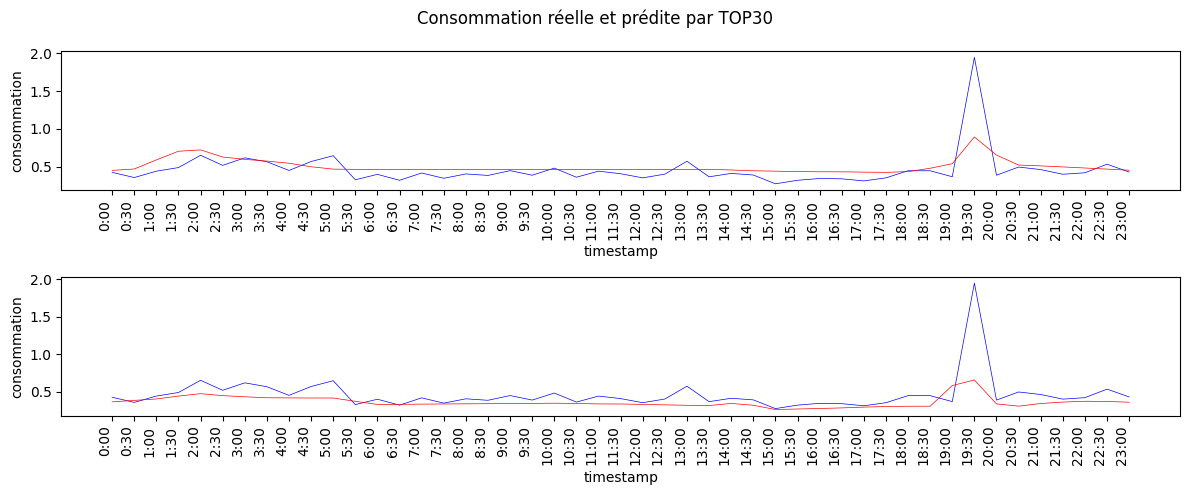

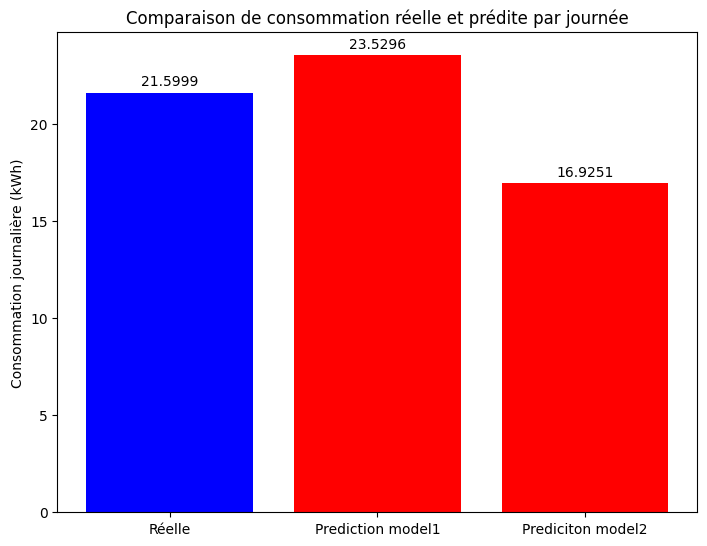

In [48]:
fig, ax = plt.subplots(2)
ax[0].plot(timestamp, conso_ref, label='Consommation réelle par TOP30 (kWh)', color='blue', linewidth=0.5)
ax[0].plot(timestamp, list_pred_model2, label='Consommation prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax[0].set_xlabel('timestamp')
ax[0].set_ylabel('consommation')
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')

ax[1].plot(timestamp, conso_ref, label='Consommation réelle par TOP30 (kWh)', color='blue', linewidth=0.5)
ax[1].plot(timestamp, list_pred_modelhard, label='Consommation prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax[1].set_xlabel('timestamp')
ax[1].set_ylabel('consommation')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')

fig.set_size_inches(12, 5)
fig.suptitle('Consommation réelle et prédite par TOP30')
fig.tight_layout()
fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Consommation journalière (kWh)')
ax.set_title('Comparaison de consommation réelle et prédite par journée')
labels = ['Réelle', 'Prediction model1', 'Prediciton model2']
bars = [sum(conso_ref), sum(list_pred_model2)[0], sum(list_pred_modelhard)[0]]
ax.bar(labels, bars, color=['blue', 'red', 'red'])
ax.bar_label(ax.containers[0], padding=3)
plt.show()

NameError: name 'list_pred_norm' is not defined

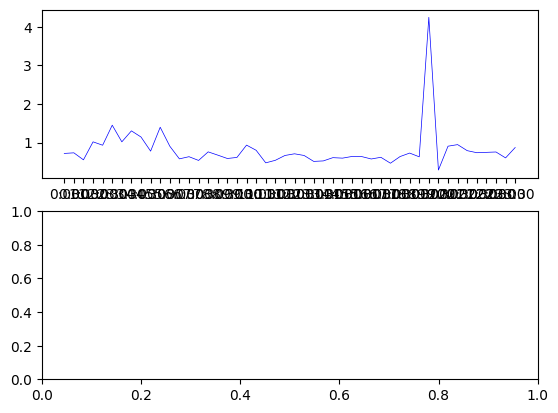

In [27]:
fig, ax = plt.subplots(2)
ax[0].plot(timestamp, conso_ref, label='Consommation réelle par TOP30 (kWh)', color='blue', linewidth=0.5)
ax[0].plot(timestamp, model1.predict(list_pred_norm), label='Consommation prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax[0].set_xlabel('timestamp')
ax[0].set_ylabel('consommation')
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')

ax[1].plot(timestamp, conso_ref, label='Consommation réelle par TOP30 (kWh)', color='blue', linewidth=0.5)
ax[1].plot(timestamp, model2.predict(list_pred_norm), label='Consommation prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax[1].set_xlabel('timestamp')
ax[1].set_ylabel('consommation')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')

fig.set_size_inches(12, 5)
fig.suptitle('Consommation réelle et prédite par TOP30')
fig.tight_layout()
fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Consommation journalière (kWh)')
ax.set_title('Comparaison de consommation réelle et prédite par journée')
labels = ['Réelle', 'Prediction model1', 'Prediciton model2']
bars = [sum(conso_ref), sum(list_pred_model2)[0], sum(list_pred_modelhard)[0]]
ax.bar(labels, bars, color=['blue', 'red', 'red'])
ax.bar_label(ax.containers[0], padding=3)
plt.show()

In [49]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler


scaler = pickle.load(open('../../models/scaler_min_max.pkl', 'rb'))
model2 = tf.keras.models.load_model('../../models/model2.h5')

#make a prediction with a value : "16,6,8,5,3,1,0"
# val = ()
# val = val.reshape(1,7)
# val = scaler.fit_transform(val)
# val = model2.predict(val)

list_housing = os.listdir('../../data/housing_data')


/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [50]:
nb_houses = []
for housing in list_housing:
    nb_houses.append((housing, len(os.listdir('../../data/housing_data/' + housing))))
    
print(nb_houses)

[('data A110-5', 394), ('data M170-6', 186), ('data M120-5', 881), ('data A150-6', 157), ('data M135-3', 593), ('data M150-4', 744), ('data M100-3', 728), ('data A130-4', 591), ('data M140-5', 666), ('data M250-5', 248), ('data M80-2', 734), ('data A50-3', 676), ('data M90-4', 847), ('data M65-3', 589), ('data A100-3', 666), ('data A120-4', 764), ('data A30-2', 536), ('data M200-6', 261), ('data M85-3', 930), ('data M160-5', 619), ('data M50-2', 619), ('data A25-1', 809), ('data M110-4', 601), ('data M180-5', 823), ('data A15-1', 241), ('data A50-2', 514)]


In [51]:
nb_foyers = 0
for i in range(len(nb_houses)):
    nb_foyers += nb_houses[i][1]

nb_foyers

15417

In [52]:
ts = 40
list_to_pred = []
list_to_pred.append([ts, 15, 12, 110, 5, 1, 0])
list_to_pred.append([ts, 15, 12, 170, 6, 0, 1])
list_to_pred.append([ts, 15, 12, 120, 5, 0, 1])
list_to_pred.append([ts, 15, 12, 150, 6, 1, 0])
list_to_pred.append([ts, 15, 12, 135, 3, 0, 1])
list_to_pred.append([ts, 15, 12, 150, 4, 0, 1])
list_to_pred.append([ts, 15, 12, 100, 3, 0, 1])
list_to_pred.append([ts, 15, 12, 130, 4, 1, 0])
list_to_pred.append([ts, 15, 12, 140, 5, 0, 1])
list_to_pred.append([ts, 15, 12, 250, 5, 0, 1])
list_to_pred.append([ts, 15, 12, 80, 2, 1, 0])
list_to_pred.append([ts, 15, 12, 50, 3, 1, 0])
list_to_pred.append([ts, 15, 12, 90, 4, 0, 1])
list_to_pred.append([ts, 15, 12, 95, 3, 0, 1])
list_to_pred.append([ts, 15, 12, 100, 3, 1, 0])
list_to_pred.append([ts, 15, 12, 120, 4, 1, 0])
list_to_pred.append([ts, 15, 12, 30, 2, 1, 0])
list_to_pred.append([ts, 15, 12, 200, 6, 0, 1])
list_to_pred.append([ts, 15, 12, 85, 3, 0, 1])
list_to_pred.append([ts, 15, 12, 160, 5, 0, 1])
list_to_pred.append([ts, 15, 12, 50, 2, 0, 1])
list_to_pred.append([ts, 15, 12, 25, 1, 1, 0])
list_to_pred.append([ts, 15, 12, 110, 4, 0, 1])
list_to_pred.append([ts, 15, 12, 180, 5, 0, 1])
list_to_pred.append([ts, 15, 12, 15, 1, 1, 0])
list_to_pred.append([ts, 15, 12, 50, 2, 1, 0])

In [174]:
pred = []
for i in range(48):
    pred.append([])


In [175]:
len(pred)

48

In [176]:
for i in range(len(pred)):
    pred[i].append([i, 15, 12, 110, 5, 1, 0])
    pred[i].append([i, 15, 12, 170, 6, 0, 1])
    pred[i].append([i, 15, 12, 120, 5, 0, 1])
    pred[i].append([i, 15, 12, 150, 6, 1, 0])
    pred[i].append([i, 15, 12, 135, 3, 0, 1])
    pred[i].append([i, 15, 12, 150, 4, 0, 1])
    pred[i].append([i, 15, 12, 100, 3, 0, 1])
    pred[i].append([i, 15, 12, 130, 4, 1, 0])
    pred[i].append([i, 15, 12, 140, 5, 0, 1])
    pred[i].append([i, 15, 12, 250, 5, 0, 1])
    pred[i].append([i, 15, 12, 80, 2, 1, 0])
    pred[i].append([i, 15, 12, 50, 3, 1, 0])
    pred[i].append([i, 15, 12, 90, 4, 0, 1])
    pred[i].append([i, 15, 12, 95, 3, 0, 1])
    pred[i].append([i, 15, 12, 100, 3, 1, 0])
    pred[i].append([i, 15, 12, 120, 4, 1, 0])
    pred[i].append([i, 15, 12, 30, 2, 1, 0])
    pred[i].append([i, 15, 12, 200, 6, 0, 1])
    pred[i].append([i, 15, 12, 85, 3, 0, 1])
    pred[i].append([i, 15, 12, 160, 5, 0, 1])
    pred[i].append([i, 15, 12, 50, 2, 0, 1])
    pred[i].append([i, 15, 12, 25, 1, 1, 0])
    pred[i].append([i, 15, 12, 110, 4, 0, 1])
    pred[i].append([i, 15, 12, 180, 5, 0, 1])
    pred[i].append([i, 15, 12, 15, 1, 1, 0])
    pred[i].append([i, 15, 12, 50, 2, 1, 0])

In [177]:
len(pred)

48

In [178]:
# scaler_mm.transform(pred[0])

In [179]:
for i in range(len(pred)):
    pred[i] = scaler_mm.transform(pred[i])

/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fit

In [180]:
len(pred)

48

In [181]:
# model2.predict(pred[0])

In [182]:
for i in range(len(pred)):
    pred[i] = model2.predict(pred[i])

1/1 [==============================] - 0s 21ms/step


In [183]:
len(pred)

48

In [184]:
len(pred[0])

26

In [185]:
pred[0][0] * 394

array([334.37585], dtype=float32)

In [186]:
for i in range(len(pred)):
    for j in range(len(pred[i])):
        pred[i][j] = pred[i][j] * nb_houses[j][1]

In [187]:
len(pred)

48

In [188]:
len(pred[0])

26

In [189]:
sum(pred[0])

array([13198.44], dtype=float32)

In [190]:
for i in range(len(pred)):
    pred[i] = sum(pred[i])
    pred[i] = pred[i][0]

In [191]:
pred

[13198.44,
 13401.315,
 13642.708,
 16564.787,
 20963.492,
 21676.053,
 17622.375,
 16907.176,
 16423.44,
 15976.146,
 15527.289,
 14495.371,
 12553.797,
 12170.845,
 12162.175,
 12154.914,
 12149.681,
 12144.487,
 12139.481,
 12136.217,
 12133.174,
 12129.504,
 12125.762,
 12121.717,
 12118.505,
 12114.667,
 12110.622,
 12106.636,
 12103.701,
 12076.882,
 11481.743,
 10520.173,
 9924.592,
 9671.008,
 9588.131,
 9548.512,
 9630.415,
 10522.084,
 12167.626,
 14042.619,
 20570.63,
 29078.309,
 27014.969,
 24653.18,
 13997.272,
 13022.696,
 12795.477,
 12575.021]

array([13401.315], dtype=float32)

In [137]:
len(pred[0])

1

In [7]:
list_to_pred_norm = scaler.transform(list_to_pred)

/home/cytech/spie_project/spie-project/.SPIE/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [8]:
cons_predicted = model2.predict(list_to_pred_norm)

1/1 [==============================] - 0s 271ms/step


In [9]:
len(cons_predicted)

26

In [10]:
for i in range(len(cons_predicted)):
    cons_predicted[i] = cons_predicted[i] * nb_houses[i][1]

In [11]:
# cons_total_per_top = []
# for i in range(len(cons_predicted)):
#     cons_total_per_top.append(cons_predicted[i].sum())

In [12]:
cons_total = cons_predicted.sum()

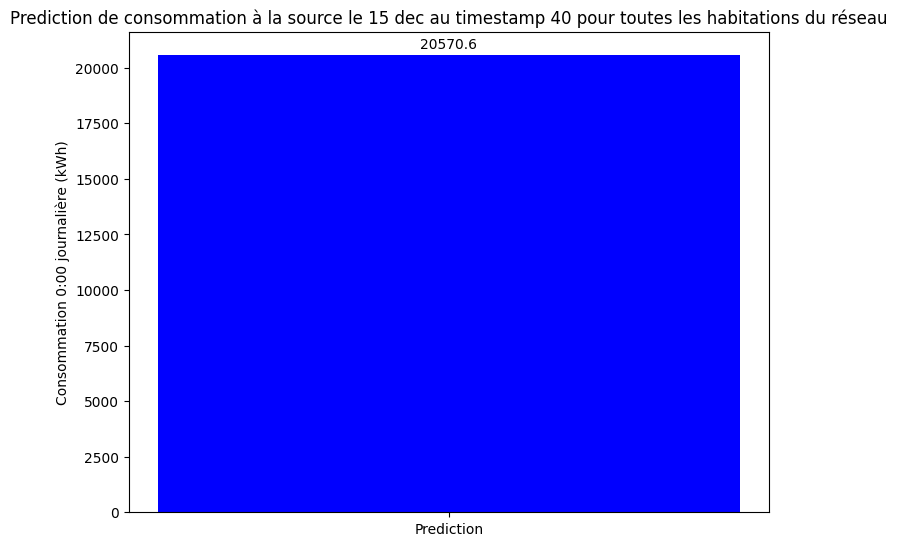

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Consommation 0:00 journalière (kWh)')
ax.set_title(f'Prediction de consommation à la source le 15 dec au timestamp {ts} pour toutes les habitations du réseau')
labels = ['Prediction']
bars = [cons_total]
ax.bar(labels, bars, color=['blue'])
ax.bar_label(ax.containers[0], padding=3)
plt.show()

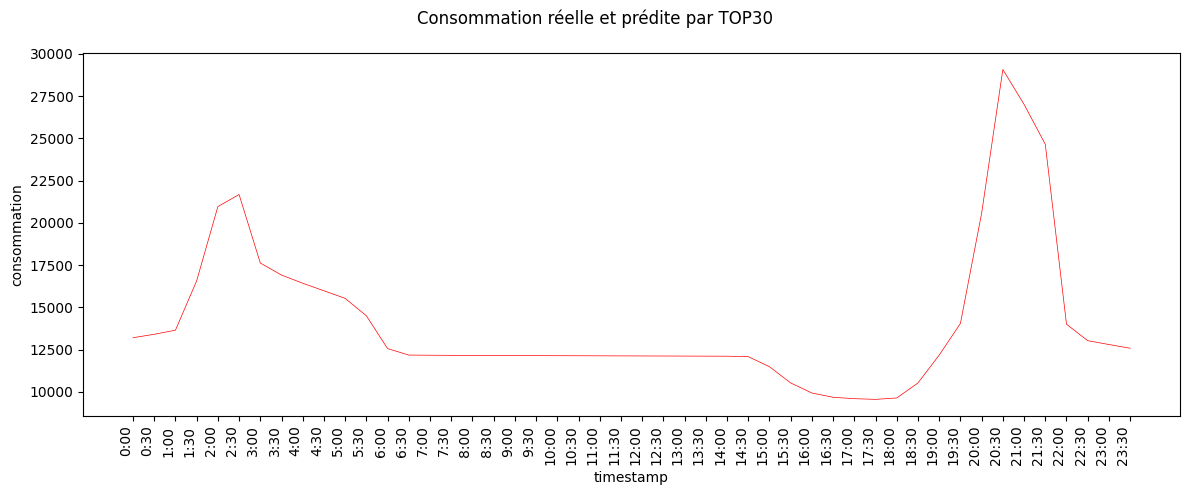

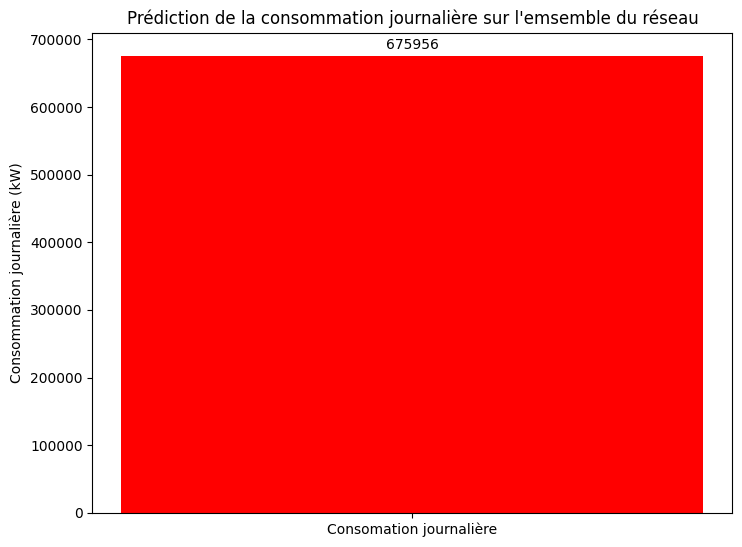

In [193]:

timestamp = ["0:00", "0:30", "1:00", "1:30", "2:00", "2:30", "3:00", "3:30", "4:00", "4:30", "5:00", "5:30", "6:00", "6:30", "7:00", "7:30", "8:00", "8:30", "9:00", "9:30", "10:00", "10:30", "11:00", "11:30", "12:00", "12:30", "13:00", "13:30", "14:00", "14:30", "15:00", "15:30", "16:00", "16:30", "17:00", "17:30", "18:00", "18:30", "19:00", "19:30", "20:00", "20:30", "21:00", "21:30", "22:00", "22:30", "23:00", "23:30"]
fig, ax = plt.subplots()
ax.plot(timestamp, pred, label='Consommation totale prédite par TOP30 (kWh)', color='red', linewidth=0.5)
ax.set_xlabel('timestamp')
ax.set_ylabel('consommation')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

fig.set_size_inches(12, 5)
fig.suptitle('Consommation réelle et prédite par TOP30')
fig.tight_layout()
fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Consommation journalière (kW)')
ax.set_title('Prédiction de la consommation journalière sur l\'emsemble du réseau')
labels = ['Consomation journalière']
bars = [sum(pred)]
ax.bar(labels, bars, color=['red'])
ax.bar_label(ax.containers[0], padding=3)
plt.show()


In [194]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0